## Data Analysis for K-MEANS clustering

Purpose: Find relevant dataset columns to increase accuracy of the model

1. Find relevance between columns
  - First, drop no numeric columns
  - Second, use `.corr()` to find relevance between columns
    - Pearson: For linear dataset
    - Spearman: For non-linear dataset
    - Due to complexity and diversity of weather data it is right to use **spearman** but let's use **pearson** also for practice
  - Third, after finding related columns use `PCA` to find which group of columns are related to target
2. Find causality between columns
  - First, drop no numeric columns
  - Second, use `Granger Causality Test`
  - Third, use `DoWhy Test`
  - Fourth, use all


## Import and Setting
1. Basic imports
  - os
  - pandas
  - numpy

2. Visualization
  - matplotlib
  - seaborn as sns
3. Building a model
  - sklearn
    - StandardScaler
    - KMeans

In [36]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')
import shutil
import os
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Korean 한글 추가

In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import unicodedata

In [28]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [38]:
fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 8, 'font.family': 'NanumGothic'})
mpl.rcParams['axes.unicode_minus'] = False

## Relevance Check

In [ ]:
# Getting csv
directory_path = '/content/drive/MyDrive/CSVs/JejuWeather'
csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]

# 마라도 - for testing
data = pd.read_csv(os.path.join(directory_path, csv_files[0]))
data.drop(columns=['baseDate', 'observatoryName'], inplace=True)
features = data.columns
# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Correlation Check
corr_df = data.corr()

# heatMap visualization
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.title('Jeju Weather HeatMap')
plt.show()

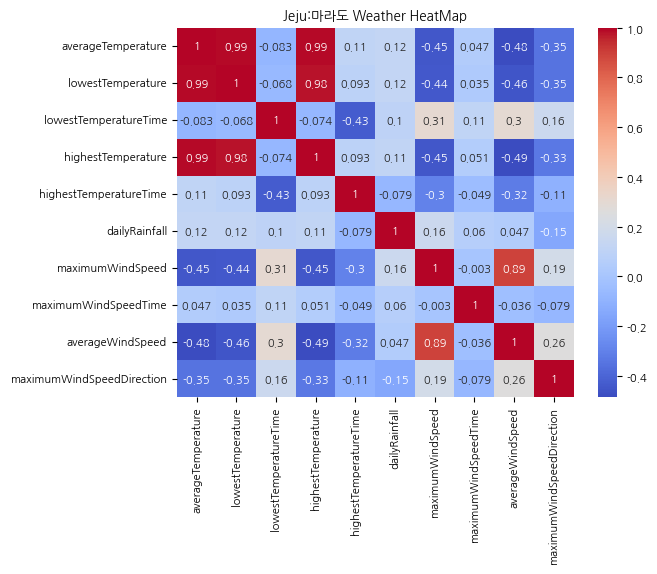

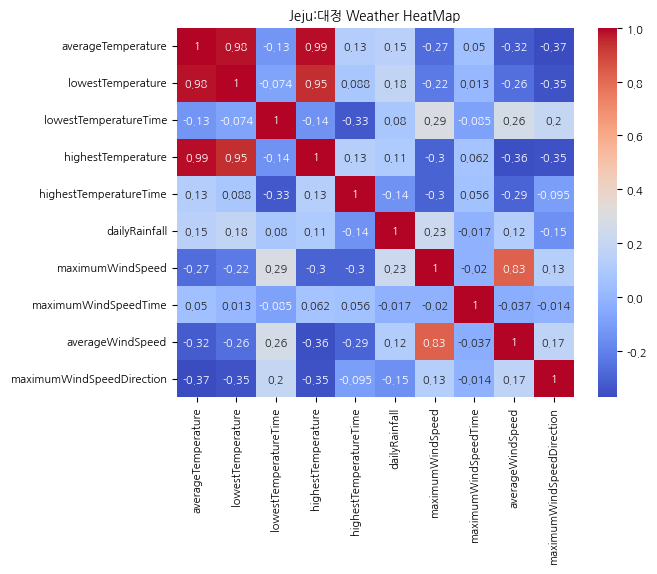

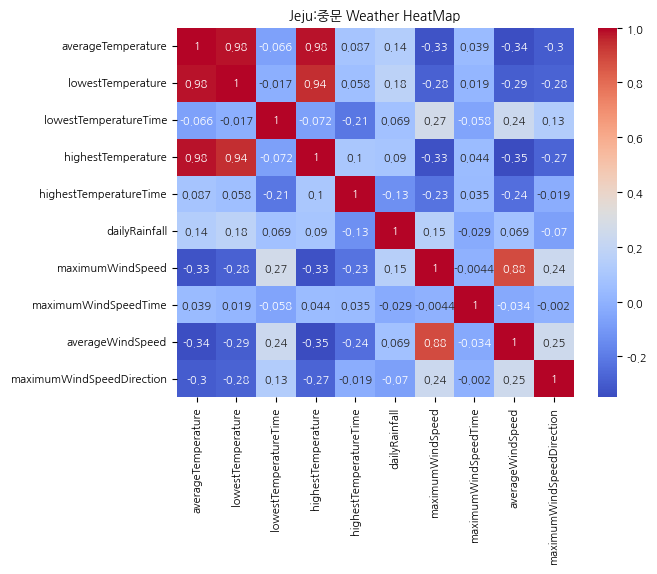

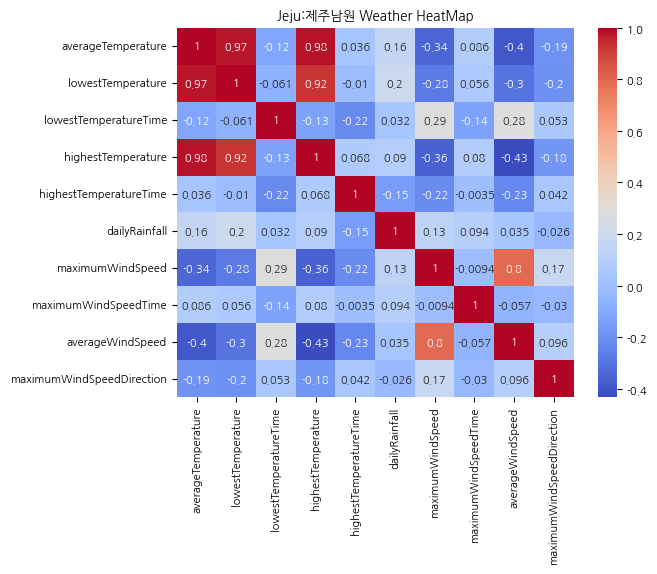

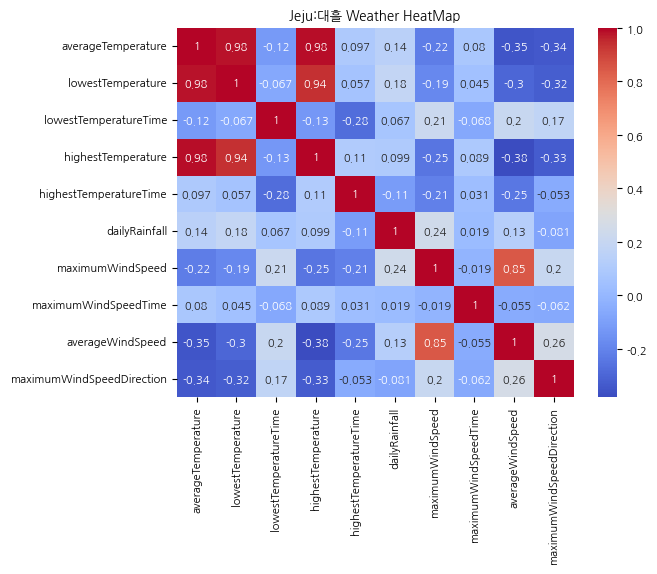

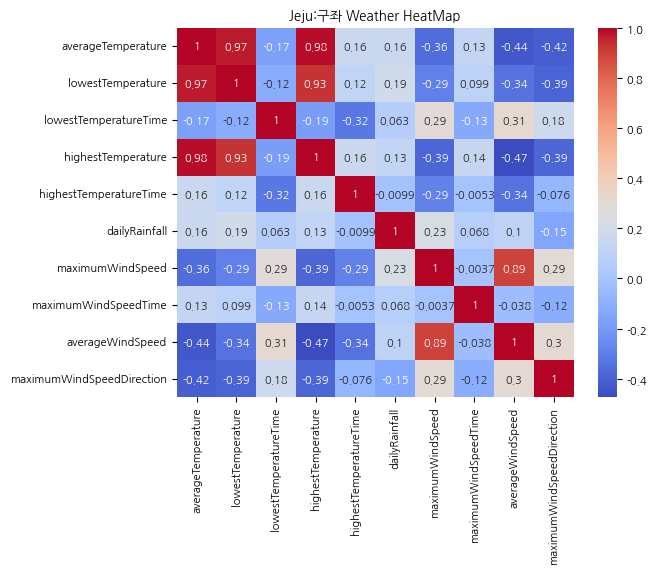

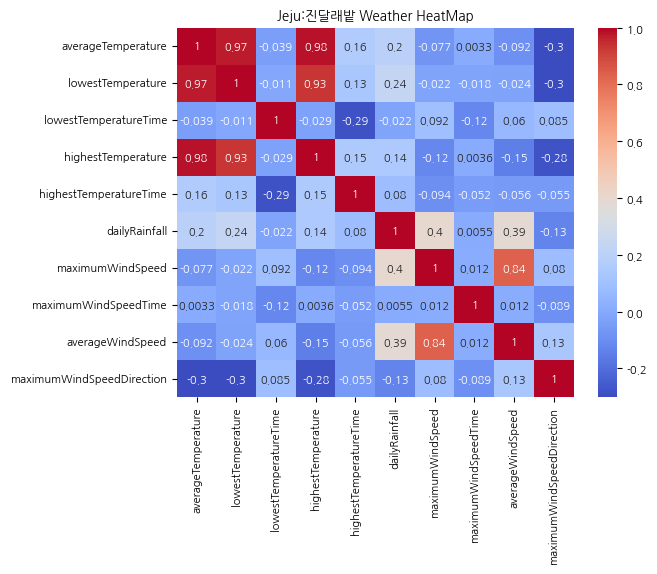

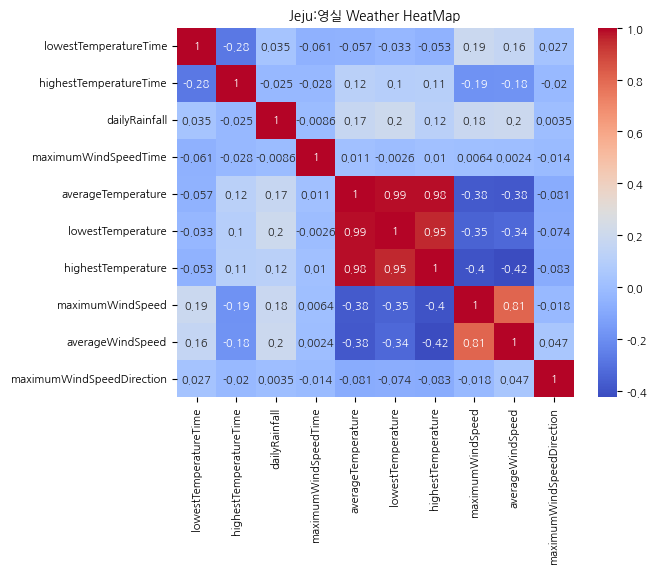

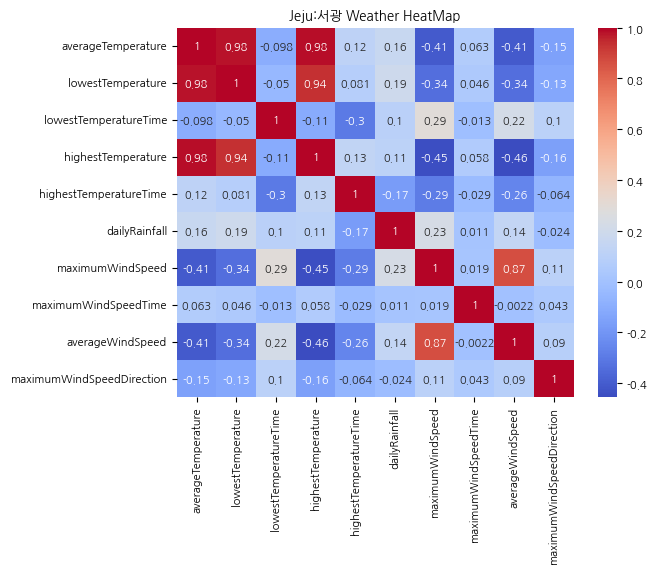

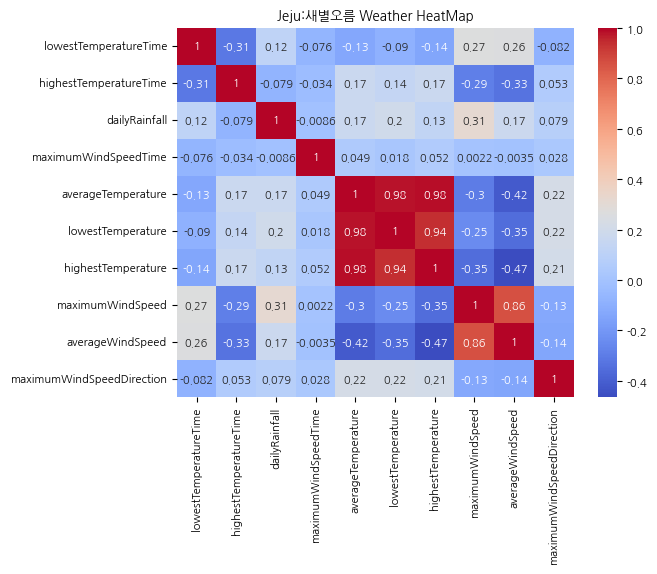

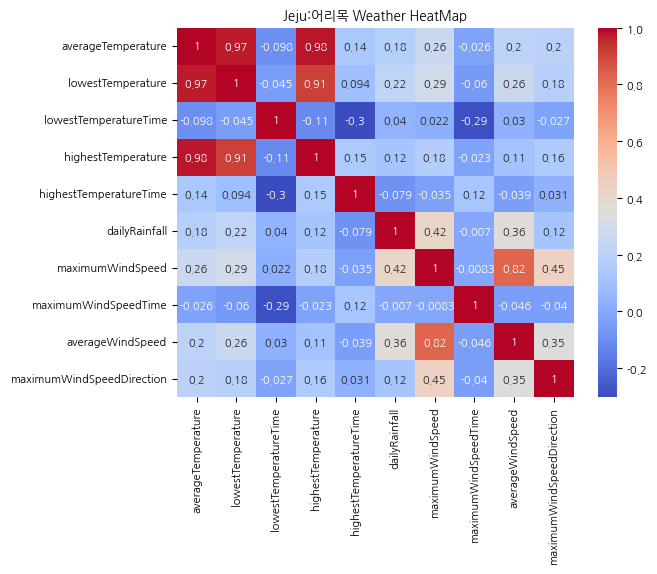

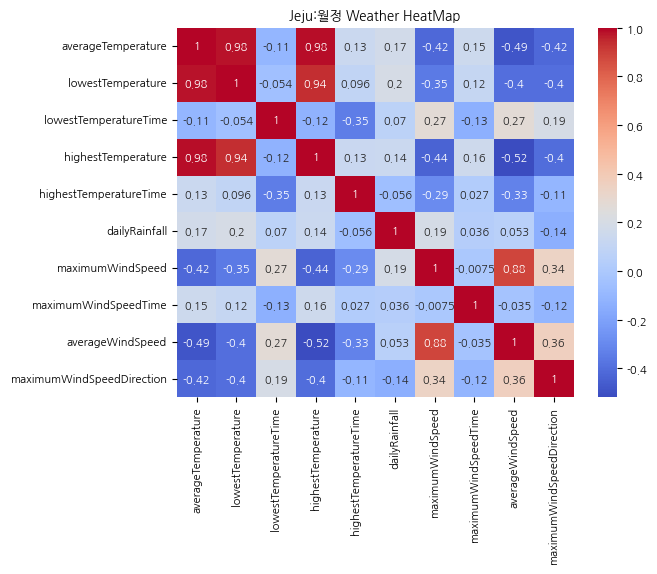

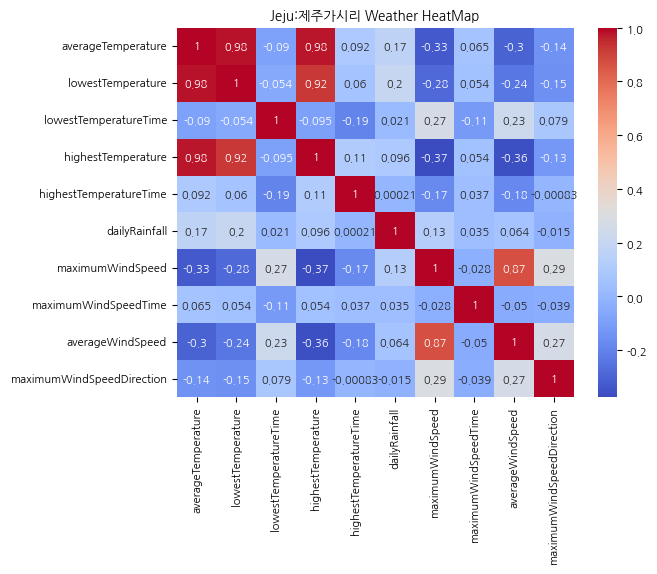

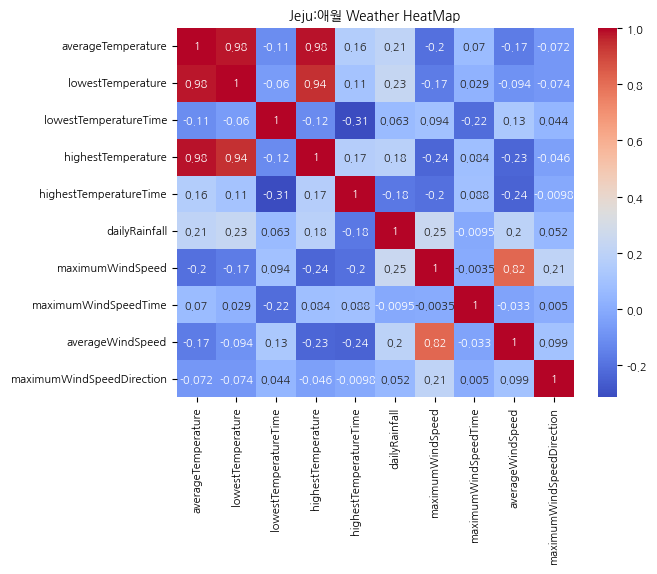

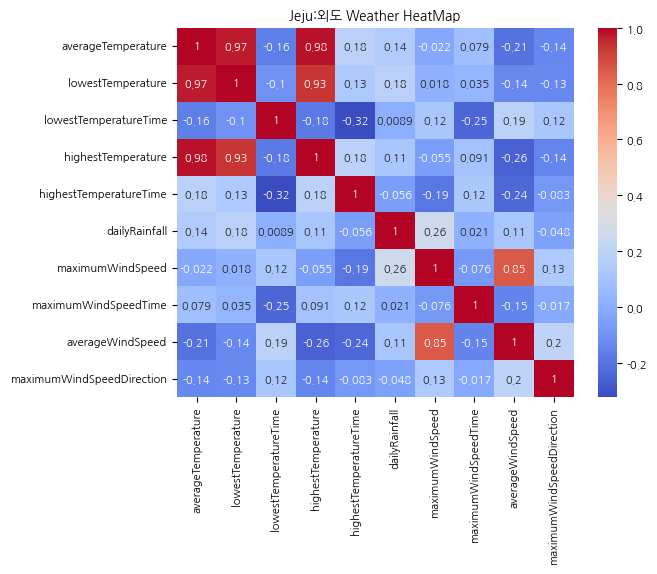

In [40]:
for csv_file in csv_files:
  data = pd.read_csv(os.path.join(directory_path, csv_file))
  data.drop(columns=['baseDate', 'observatoryName'], inplace=True)
  features = data.columns
  # Normalize data
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(data[features])

  # Correlation Check
  corr_df = data.corr()

  # heatMap visualization
  sns.heatmap(corr_df, annot=True, cmap='coolwarm')
  korean_name = unicodedata.normalize('NFC', csv_file[:-4])
  plt.title(f'Jeju:{korean_name} Weather HeatMap')
  # Image saving
  if (not os.path.exists(os.path.join(directory_path, korean_name))):
    os.makedirs(os.path.join(directory_path, korean_name))

  plt.savefig(f'{korean_name}.png')
  destination = '/content/drive/MyDrive/CSVs/JejuWeather/' + korean_name + '/' + korean_name + '.png'
  if (os.path.exists(destination)):
    os.remove(destination)
  shutil.move(f'{korean_name}.png', destination)
  plt.show()


## Causlaity Check